## Pregunta 1: Entrenamiento de RNNs en una Serie de Tiempo

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.metrics import mean_squared_error

*   **Parte a)**



In [0]:
name_f = "https://github.com/csaldias/tarea2-RedesNeuronales/raw/master/time_series_data.csv"
dataframe = pd.read_csv(name_f,sep=',',usecols=[1],engine='python',skipfooter = 3)[:2000]
dataframe[:] = dataframe[:].astype('float32')
df_train, df_test = dataframe[:1500].values, dataframe[1500:].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)).fit(df_train)
stream_train_scaled = scaler.transform(df_train)
stream_test_scaled = scaler.transform(df_test)

*   **Parte b)**

In [0]:
def create_dataset(dataset,lag=1):
    dataX = []
    dataY = []
    for index in range(len(dataset)-lag):
        dataX.append(dataset[index:index+lag])
        dataY.append(dataset[index+lag])
    return np.array(dataX),np.array(dataY)

*   **Parte c)**

In [0]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

*   **Parte d)**

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#trainY = np.reshape(trainY, (trainY.shape[0], 1, trainY.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#testY = np.reshape(testY, (testY.shape[0], 1, testY.shape[1]))

*   **Parte e)**

In [34]:
model = Sequential()
model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, activation="tanh", input_shape=(None, 3), recurrent_activation="sigmoid")`
  


Epoch 1/25
1497/1497 [==============================] - 14s 9ms/step - loss: 0.0267
Epoch 2/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0119
Epoch 3/25
1118/1497 [=====================>........] - ETA: 3s - loss: 0.0115

1497/1497 [==============================] - 13s 9ms/step - loss: 0.0111
Epoch 4/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0108
Epoch 5/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0105
Epoch 6/25
  81/1497 [>.............................] - ETA: 12s - loss: 0.0104

1497/1497 [==============================] - 13s 9ms/step - loss: 0.0104
Epoch 7/25
1497/1497 [==============================] - 13s 9ms/step - loss: 0.0101
Epoch 8/25
1324/1497 [=========================>....] - ETA: 1s - loss: 0.0102

1497/1497 [==============================] - 13s 8ms/step - loss: 0.0102
Epoch 9/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0102
Epoch 10/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0102
Epoch 11/25
 130/1497 [=>............................] - ETA: 11s - loss: 0.0103

1497/1497 [==============================] - 13s 9ms/step - loss: 0.0102
Epoch 12/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0102
Epoch 13/25
1322/1497 [=========================>....] - ETA: 1s - loss: 0.0103

1497/1497 [==============================] - 13s 9ms/step - loss: 0.0102
Epoch 14/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0102
Epoch 15/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0101
Epoch 16/25
 113/1497 [=>............................] - ETA: 11s - loss: 0.0097

1497/1497 [==============================] - 13s 9ms/step - loss: 0.0101
Epoch 17/25
1497/1497 [==============================] - 13s 9ms/step - loss: 0.0101
Epoch 18/25
1331/1497 [=========================>....] - ETA: 1s - loss: 0.0101

1497/1497 [==============================] - 13s 8ms/step - loss: 0.0101
Epoch 19/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0101
Epoch 20/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0101
Epoch 21/25
 123/1497 [=>............................] - ETA: 11s - loss: 0.0099

1497/1497 [==============================] - 13s 9ms/step - loss: 0.0101
Epoch 22/25
1497/1497 [==============================] - 13s 8ms/step - loss: 0.0101
Epoch 23/25
1308/1497 [=========================>....] - ETA: 1s - loss: 0.0101

1497/1497 [==============================] - 13s 9ms/step - loss: 0.0102
Epoch 24/25
1497/1497 [==============================] - 13s 9ms/step - loss: 0.0101
Epoch 25/25
1497/1497 [==============================] - 13s 9ms/step - loss: 0.0101


*   **Parte f)**

In [0]:
trainPredict = model.predict(trainX,batch_size=1)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)

In [0]:
testPredict = model.predict(testX,batch_size=1)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

*   **Parte g)**

In [47]:
print(trainPredict)

[[18.24618  ]
 [14.620761 ]
 [15.8760195]
 ...
 [17.417486 ]
 [14.285018 ]
 [14.3234   ]]


In [49]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.61 RMSE
Test Score: 2.41 RMSE


*   **Parte h)**

In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

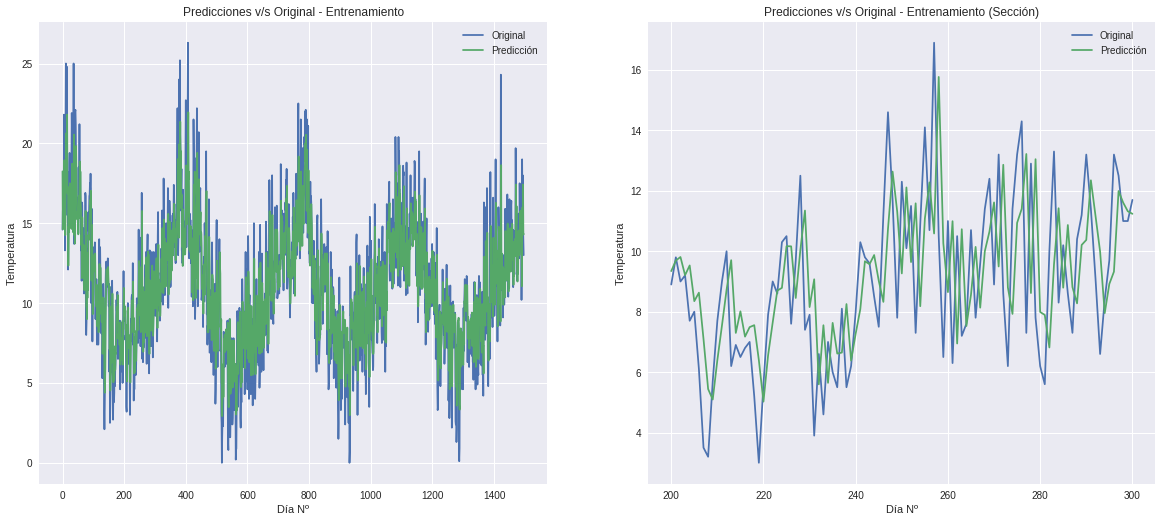

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8.5))

ax1.plot(range(len(trainY)), trainY, trainPredict)
ax1.set_title("Predicciones v/s Original - Entrenamiento")
ax1.legend(['Original', 'Predicción'], loc='upper right')
ax1.set_ylabel('Temperatura')
ax1.set_xlabel('Día Nº')

ax2.plot(range(200,301), trainY[200:301])
ax2.plot(range(200,301), trainPredict[200:301])
ax2.set_title("Predicciones v/s Original - Entrenamiento (Sección)")
ax2.legend(['Original', 'Predicción'], loc='upper right')
ax2.set_ylabel('Temperatura')
ax2.set_xlabel('Día Nº')

plt.show()

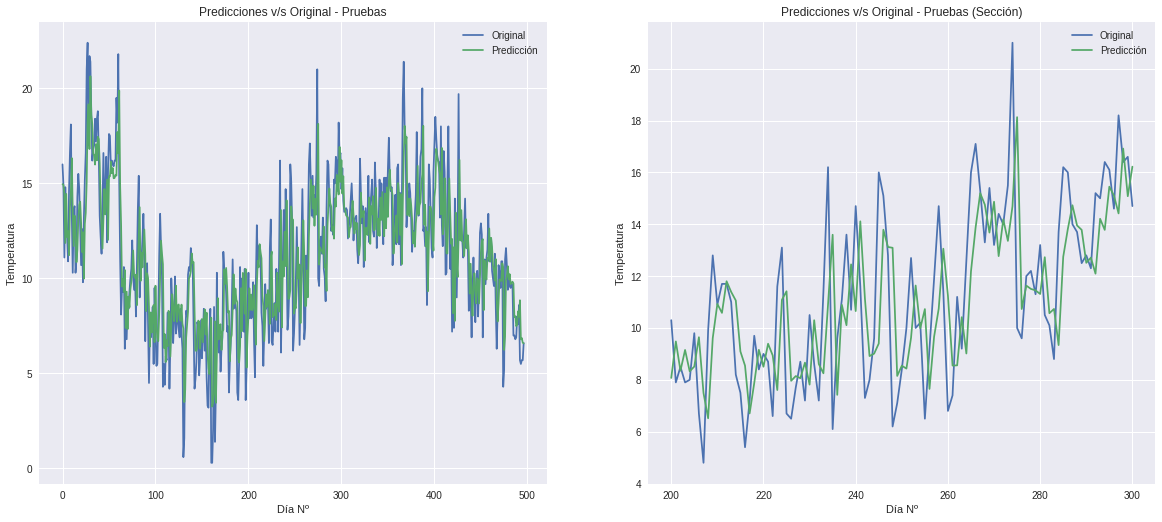

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8.5))

ax1.plot(range(len(testY)), testY, testPredict)
ax1.set_title("Predicciones v/s Original - Pruebas")
ax1.legend(['Original', 'Predicción'], loc='upper right')
ax1.set_ylabel('Temperatura')
ax1.set_xlabel('Día Nº')

ax2.plot(range(200,301), testY[200:301])
ax2.plot(range(200,301), testPredict[200:301])
ax2.set_title("Predicciones v/s Original - Pruebas (Sección)")
ax2.legend(['Original', 'Predicción'], loc='upper right')
ax2.set_ylabel('Temperatura')
ax2.set_xlabel('Día Nº')

plt.show()

*   **Parte i)**

In [73]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
model = Sequential()
model.add(LSTM(4, input_dim=1, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, activation="tanh", input_shape=(None, 1), recurrent_activation="sigmoid")`
  import sys


Epoch 1/25
1497/1497 [==============================] - 17s 12ms/step - loss: 0.0246
Epoch 2/25
1497/1497 [==============================] - 17s 12ms/step - loss: 0.0115
Epoch 3/25
 479/1497 [========>.....................] - ETA: 11s - loss: 0.0114

1497/1497 [==============================] - 17s 12ms/step - loss: 0.0112
Epoch 4/25
1497/1497 [==============================] - 17s 12ms/step - loss: 0.0110
Epoch 5/25
 767/1497 [==============>...............] - ETA: 8s - loss: 0.0104

1497/1497 [==============================] - 17s 12ms/step - loss: 0.0109
Epoch 6/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0108
Epoch 7/25
 844/1497 [===============>..............] - ETA: 7s - loss: 0.0103

1497/1497 [==============================] - 17s 12ms/step - loss: 0.0107
Epoch 8/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0107
Epoch 9/25
 885/1497 [================>.............] - ETA: 6s - loss: 0.0102

1497/1497 [==============================] - 17s 11ms/step - loss: 0.0104
Epoch 10/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0103
Epoch 11/25
 880/1497 [================>.............] - ETA: 7s - loss: 0.0095

1497/1497 [==============================] - 17s 11ms/step - loss: 0.0101
Epoch 12/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0101
Epoch 13/25
 886/1497 [================>.............] - ETA: 6s - loss: 0.0097

1497/1497 [==============================] - 17s 11ms/step - loss: 0.0101
Epoch 14/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0101
Epoch 15/25
 894/1497 [================>.............] - ETA: 6s - loss: 0.0105

1497/1497 [==============================] - 17s 11ms/step - loss: 0.0100
Epoch 16/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0101
Epoch 17/25
 889/1497 [================>.............] - ETA: 6s - loss: 0.0100

1497/1497 [==============================] - 17s 11ms/step - loss: 0.0101
Epoch 18/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0100
Epoch 19/25
 896/1497 [================>.............] - ETA: 6s - loss: 0.0097

1497/1497 [==============================] - 17s 11ms/step - loss: 0.0100
Epoch 20/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0101
Epoch 21/25
 889/1497 [================>.............] - ETA: 6s - loss: 0.0103

1497/1497 [==============================] - 17s 11ms/step - loss: 0.0100
Epoch 22/25
1497/1497 [==============================] - 17s 11ms/step - loss: 0.0101
Epoch 23/25
 882/1497 [================>.............] - ETA: 7s - loss: 0.0102

1497/1497 [==============================] - 17s 11ms/step - loss: 0.0100
Epoch 24/25
1497/1497 [==============================] - 17s 12ms/step - loss: 0.0100
Epoch 25/25
 872/1497 [================>.............] - ETA: 7s - loss: 0.0098

1497/1497 [==============================] - 17s 12ms/step - loss: 0.0100


In [74]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11.12 RMSE
Test Score: 11.18 RMSE
